Карпеченко Дмитрий, dz13 v/0/1

In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.pipeline import Pipeline

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
path='D:\TeachMeSkills\DZ\dz13\HP.txt'

# Дополнительные стоп слова
additionalStopWords=set((r'\n', '\n\n', '\n   ','—', '…',"’",' ', 'mr.','mrs.','di', '1','   ','17', 'h.', '“he','15', 'voice:“fir','4','\xa0','“oh','“','st','d’yeh','1473','like“mimblewimble','shhh','said,“anythe','saying,“the', 'hmm', 'aaaaaaaaaargh','\n    ','they’refamous' ));

In [4]:
with open(path, encoding='cp1252') as f:
        text = f.read();

In [5]:
len(text)

442277

Удалим числа

In [6]:
text = re.sub(r"\d+", "", text, flags=re.UNICODE)

In [7]:
len(text)

442209

Замена на леммы слов

In [8]:
tokenSource = nlp(text)
tokens = [word.lemma_.lower() for word in tokenSource]

Исключение пунктуации

In [9]:
tokens = [word for word in tokens
          if word not in string.punctuation]

Обработка стоп-слов

In [10]:
tokens = [word for word in tokens
          if word not in STOP_WORDS
          and word not in additionalStopWords]

Удалим слова меньше 3х символов

In [11]:
tokens = [word for word in tokens
          if len(word)>2]

In [12]:
tokens = list(set(tokens))


In [13]:
tokens

['snot',
 'versus',
 'headfirst',
 'tuck',
 'borrow',
 'lesson',
 'whisper,“it',
 'slot',
 'emerge',
 'fluid',
 'panic',
 'getting',
 'jewel',
 'it’sfunny',
 'approach',
 'new',
 'scared',
 'stoke',
 'mouth',
 'legend',
 'teabag',
 'enemy',
 'route',
 'mix',
 'hehate',
 'thirst',
 'yehwere',
 'ashamed',
 'centaur',
 'flailing',
 'adrian',
 'saturday',
 'herbs',
 'hobble',
 'deck',
 'perfect',
 'dwarf',
 'bodied',
 'add',
 'hebridean',
 'mightn',
 'turn',
 'constrictor',
 'blonde',
 'model',
 'living',
 'leader',
 'porridge',
 'aff',
 'tarantula',
 'tying',
 'parking',
 'barely',
 'balance',
 'list',
 'jinx',
 'damage',
 'thankful',
 'understand',
 'sideway',
 'killer',
 'nibble',
 'unicorn',
 'harp',
 'dangerous',
 'strengthen',
 'hammering',
 'nimbus',
 'opposite',
 'lawn',
 'coast',
 'coulda',
 'speed',
 'muddy',
 'immediately',
 'finger',
 'enid',
 'seventeen',
 'dinky',
 'catcall',
 'oddment',
 'collapse',
 'downstairs',
 'crowd',
 'yeh',
 'merely',
 'minutesonly',
 'clever',
 'see

In [14]:
vectorizer = TfidfVectorizer()

In [15]:
X = vectorizer.fit_transform(tokens)

In [16]:
vectorizer.get_feature_names_out()

array(['aaaaarrrgh', 'aaaargh', 'aaah', ..., 'zoo', 'zoom', 'zooming'],
      dtype=object)

In [17]:
print(X.shape)

(4391, 4311)


In [18]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3500, n_iter=7, random_state=42)
'''pca = PCA(n_components=2)'''

'pca = PCA(n_components=2)'

In [19]:
svd.fit(X)

TruncatedSVD(n_components=3500, n_iter=7, random_state=42)

In [20]:
X_svd=svd.transform(X)

In [21]:
X_svd.shape

(4391, 3500)

In [22]:
print(svd.components_)

[[ 1.33305145e-10 -3.77609055e-11  1.91026500e-10 ... -1.30917110e-10
  -2.05146179e-11  2.18812548e-11]
 [-4.06574774e-11 -3.67769037e-10 -6.40718034e-11 ...  3.33006636e-10
   6.96749137e-10  1.54688081e-11]
 [-7.06676245e-10  7.92565708e-10 -1.55447877e-11 ... -6.41666529e-10
   9.06436546e-10  8.34403372e-10]
 ...
 [ 1.98942542e-02  2.04767003e-02 -7.00635481e-03 ... -8.88225554e-03
   2.86971342e-03 -1.61085283e-02]
 [-2.29137240e-03  1.14373265e-03  8.87834829e-03 ...  1.89499299e-02
   6.97301946e-03 -3.82226481e-02]
 [ 1.82874529e-02  1.49806565e-02 -3.35359691e-03 ... -1.64008639e-02
   1.16464989e-02 -2.03277495e-02]]


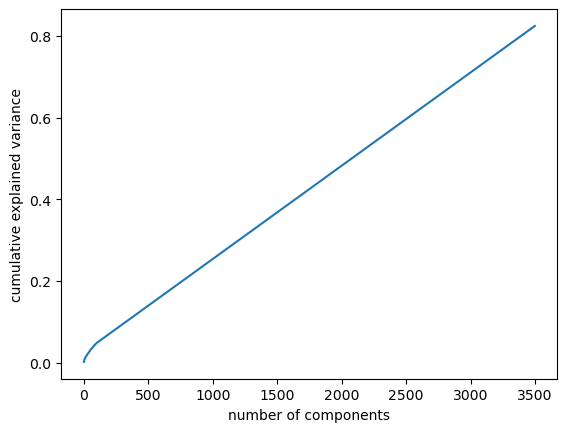

In [23]:
x = svd.fit_transform(X)
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [24]:
x

array([[ 1.59415430e-02, -1.14690086e-02,  8.08620067e-02, ...,
        -4.33953649e-05, -3.44589288e-05, -6.31042987e-05],
       [-1.71485862e-10, -6.13356767e-11, -1.58701844e-09, ...,
         3.00943162e-03, -1.28909548e-02, -2.57469568e-02],
       [-2.26064708e-10, -4.21874444e-11,  2.16018713e-10, ...,
         2.84686900e-03, -9.05533101e-03, -1.61231958e-02],
       ...,
       [ 1.23640097e-10, -3.83706580e-10,  6.37372917e-10, ...,
         9.49379898e-03, -2.49905907e-02,  2.78053151e-02],
       [ 2.71458843e-10, -4.37344074e-10,  3.90245711e-10, ...,
        -1.84308775e-02,  2.32469093e-02, -1.77594469e-03],
       [-5.49422721e-11,  4.63939210e-10, -1.43304435e-09, ...,
        -3.45328141e-03, -1.18427637e-02, -4.73138006e-03]])

In [25]:
print(svd.explained_variance_ratio_)

[0.00204474 0.00179145 0.00162912 ... 0.00022793 0.00022792 0.00022794]


In [26]:
print(svd.explained_variance_ratio_.sum())

0.8240431467337879


In [27]:
print(svd.singular_values_)

[3.00806956 2.80618001 2.67474669 ... 0.99933084 0.99926004 0.99923377]


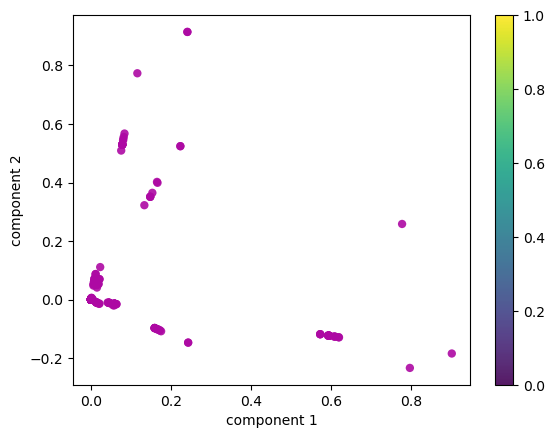

In [28]:
plt.scatter(X_svd[:, 0], X_svd[:, 1],
            c='#ad09a3', edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('turbo', 100))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()